In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [54]:
!pip install --upgrade category_encoders

In [55]:
df=pd.read_csv(r'Iris (1).csv')

In [56]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
# Encoding object features
import category_encoders as ce 

In [58]:
encoder = ce.OrdinalEncoder(cols = ['Species'])
df = encoder.fit_transform(df)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [59]:
df.shape

(150, 6)

In [60]:
df.drop('Id',axis=1,inplace=True)

In [61]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


<BarContainer object of 150 artists>

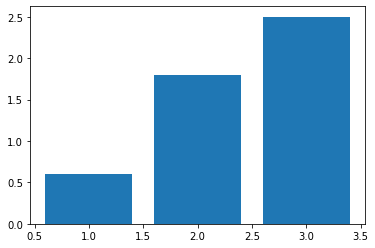

In [62]:
plt.bar(df['Species'],df['PetalWidthCm'])

In [63]:
X= df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm" ]]

In [64]:
#X=X.values
X=np.asarray(X)

In [65]:
X.dtype


dtype('float64')

In [66]:
Y=df["Species"]

In [67]:
Y=np.asarray(Y)

In [68]:
Y.dtype

dtype('int32')

In [69]:
#Train test Split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [70]:
# Create a model

In [72]:
from sklearn.svm import SVC
# fit the model
clf=SVC(kernel='rbf')
clf.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
X_test[0:5]

array([[6.4, 2.8, 5.6, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8]])

In [74]:
# Actual Values
Y_test[0:5]

array([3, 1, 3, 3, 3])

In [75]:
Y_pred=clf.predict(X_test)

In [76]:
# Predicted Values
Y_pred[0:5]

array([3, 1, 3, 3, 3])

In [77]:
Y_pred

array([3, 1, 3, 3, 3, 2, 3, 1, 1, 3, 1, 1, 1, 2, 3, 1, 2, 1, 1, 3, 1, 3,
       2, 1, 1, 1, 1, 1, 1, 3])

In [78]:
# Training Accuracy
from sklearn import metrics
Y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(Y_train, Y_train_pred))

0.9666666666666667


In [79]:
#Testing Accuracy
Y_pred = clf.predict(X_test)
print (metrics.accuracy_score(Y_test, Y_pred))

0.9666666666666667


# End